## Steepest Descent: Maximo descenso.
Cual es la direccion de maximo descenso?
Recordemos del la derivada direccional

$$ \frac{\partial J}{\partial u} = \nabla J \cdot u \tag{2} $$

Cual la direccion de maximo incremento. Recuerden

$$ u \cdot v = \| u \| \| v \| \cos \theta $$
En el caso de la ecuacion (2) el maximo valor es
cuando $\cos \theta = 1$. Es cuando $u$ esta en la direccion de $\nabla J$. Y la maxima derivada esta en la direccion (ascenso)

$$ u = \frac{\nabla J(\theta)}{\| \nabla J(\theta) \|} $$
Como lo que queremos es bajar, entonces pensamos en


$$ u = -\frac{\nabla J(\theta)}{\| \nabla J(\theta) \|} $$

El descenso por gradiente se da con la siguiente iteracion


$$\theta^{(i+1)} \approx \theta^{(i)} - \alpha \nabla_{\theta} J(\theta^{(i)}) \tag{1} .$$




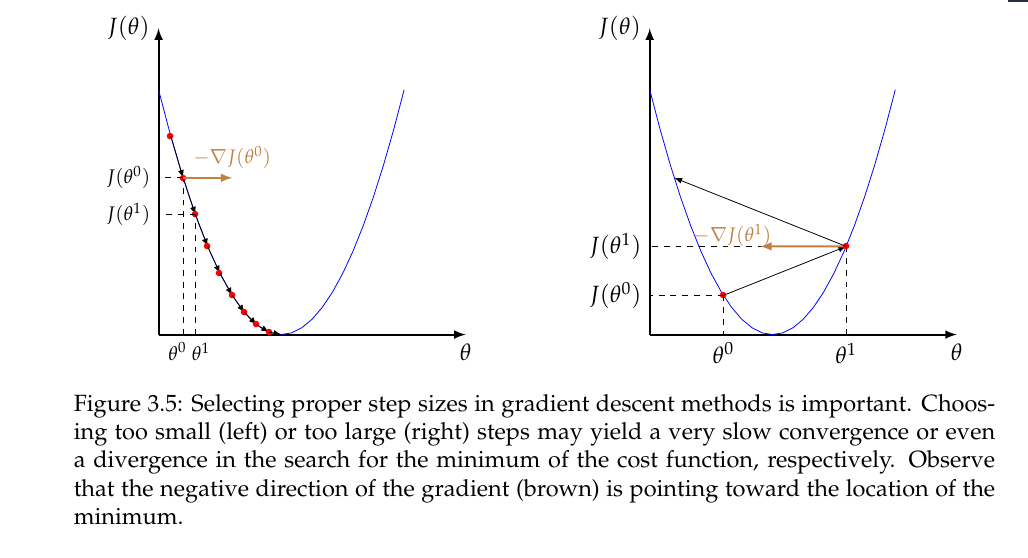

El parametro $\alpha$ se llama **learning parameter** (parametro de aprendizaje) es importante por la grafica que acabo de ilustrar.

* Si es muy pequenho la convergencia puede ser muy lenta
* Si es muy grande, puede diverger, en vez de converger.



## Steepest Descent (descenso mas empinado).
En clases anteriores planteamos el problema
$X \theta = y$
Encontramos que si la funcion objetivo (costo, de perdida) es

$$ J( \theta)  = \| X \theta - y \|^2 $$
Vimos que
$$\nabla J(\theta ) = X^T( X \theta - y) \tag{0} .$$
$$\nabla J(\theta) = 0 \implies  X^T X \theta = X^T y  $$
Bautizamos $A- X^T X$ , $b= X^T y$. Entonces
queremos resolver el problema **lineal**


$$A \theta = b $$
donde $A$ es una matriz simettrica positiva definida. Profe, y que tal si no  es positiva defina? Toca regularizar, y por ejemplo pensar en

$$(A + \lambda I) \theta = b $$

Vamos a ver que el algortimo **steepest descent** es **analitico**. Tenemos dos cosas:

1. Direccion de "caida" maxima. Ya la tenemos $\nabla J$
2. El parametro $\alpha$. Quien es $\alpha$?. Observe la ecuacion (1).

El segundo punto no lo sabemos. Ese es el proposito de los siguientes 15 minutos.

Definimos una funcion auxiliar

$$\varphi(\alpha) = J ( \theta_0 - \alpha \nabla J(\theta_0) .$$
Usamos calculo $\varphi'(\alpha) = 0$ despejamos $\alpha$.
Este $\alpha$ no es tan facil de despejar como veremos a continuacion.

Tomemos la derivada de $\varphi$ usando la regla de la cadena
para varias variables.

$$\varphi'(\alpha) = \nabla J[ \theta_0 - \alpha \nabla J(\theta_0)] \cdot \nabla J(\theta_0) = 0  .$$
Tenemos

$$ \theta_1 = \theta_0 - \alpha \nabla J(\theta_0) \tag{2}.$$


$$\varphi'(\alpha) = \nabla J( \theta_1) \cdot \nabla J(\theta_0) = 0 \tag{3}.$$

Multipliquemos (2) por $A$ ambos lados (a izquierda) y restemos $b$




$$ A \theta_1 - b = A \theta_0 - b  - \alpha A \nabla J(\theta_0) .$$

Para simplificar notacion

$$r_0 = A \theta_0 - b = \nabla J(\theta_0) .$$
$$r_1 = A \theta_1 - b = \nabla J(\theta_1).$$
La ecuacion (3) queda

$$r_1 = r_0 - \alpha A \nabla J(\theta_0) = r_0 - \alpha A r_0.
 \tag{5} $$

La ecuacion (0) dice

$$\nabla J(\theta ) = X^T( X \theta - y) = X^T X \theta - X^T y = A \theta - b .$$

$$\nabla J(\theta_0 ) =  A \theta_0 - b = r_0.$$

De la ecuacion (3) tenemos $\langle r_0 , r_1 \rangle = 0$

Multiplicamos (producto interno) la ecuacion (5) por $r_0$

$$\langle r_1, r_0 \rangle  = \langle r_0, r_0 \rangle - \alpha \langle A r_0, r_0 \rangle $$

Es decir

$$0 = \| r \|^2 - \alpha r_0^T A r_0 $$
De aca podemos despejar $\alpha$.

De aca

$$\alpha = \frac{\| r_0 \|^2}{r_0^T A r_0}.$$


El pseudocodigo para SD es:

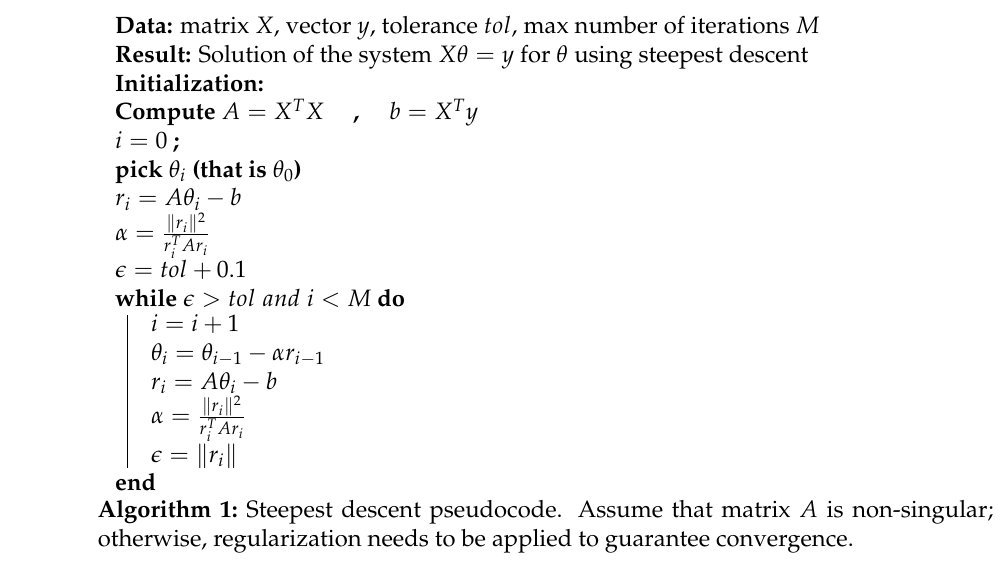

**Ejemplo 1**: Me invente la siguiente matriz

$$ A = \begin{pmatrix} 10 & 0 \\ 0 & 1 \end{pmatrix} $$

$$ b = \binom{1}{-1} $$

$$J(\theta) = \frac12 \theta^T A \theta - b^T \theta
= \frac12 \theta^T X^T X \theta - y^T X \theta = 5 \theta_0^2 + \frac12 \theta_1^2 - \theta_0 + \theta_1  .$$




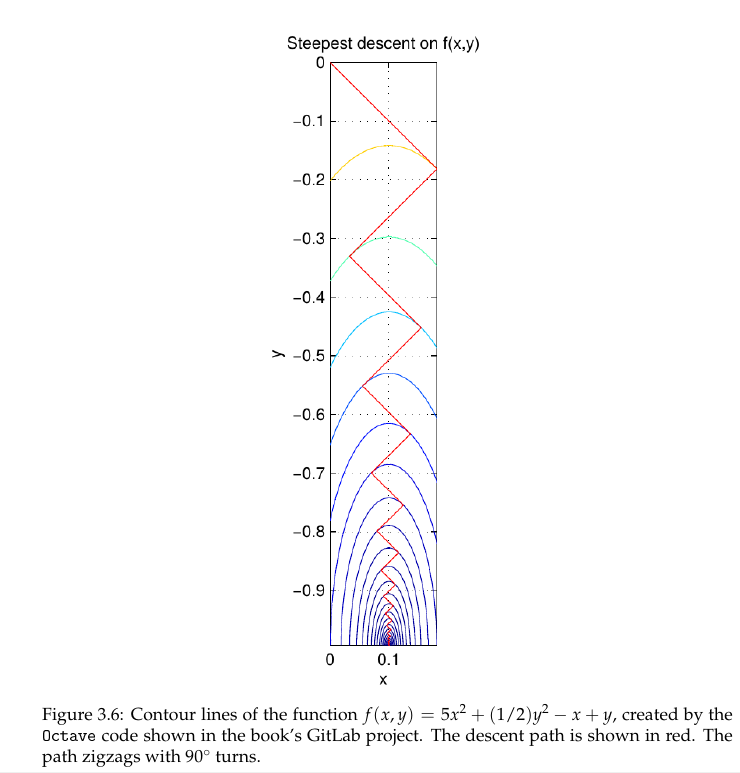

Tabla de valores:

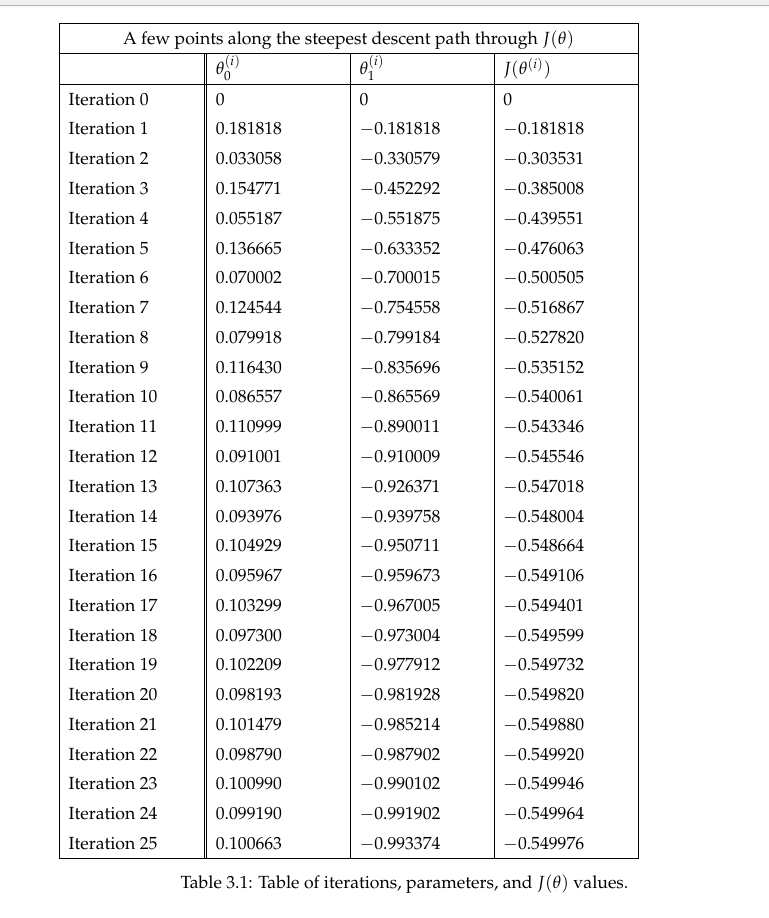

Otra grafica en 3D

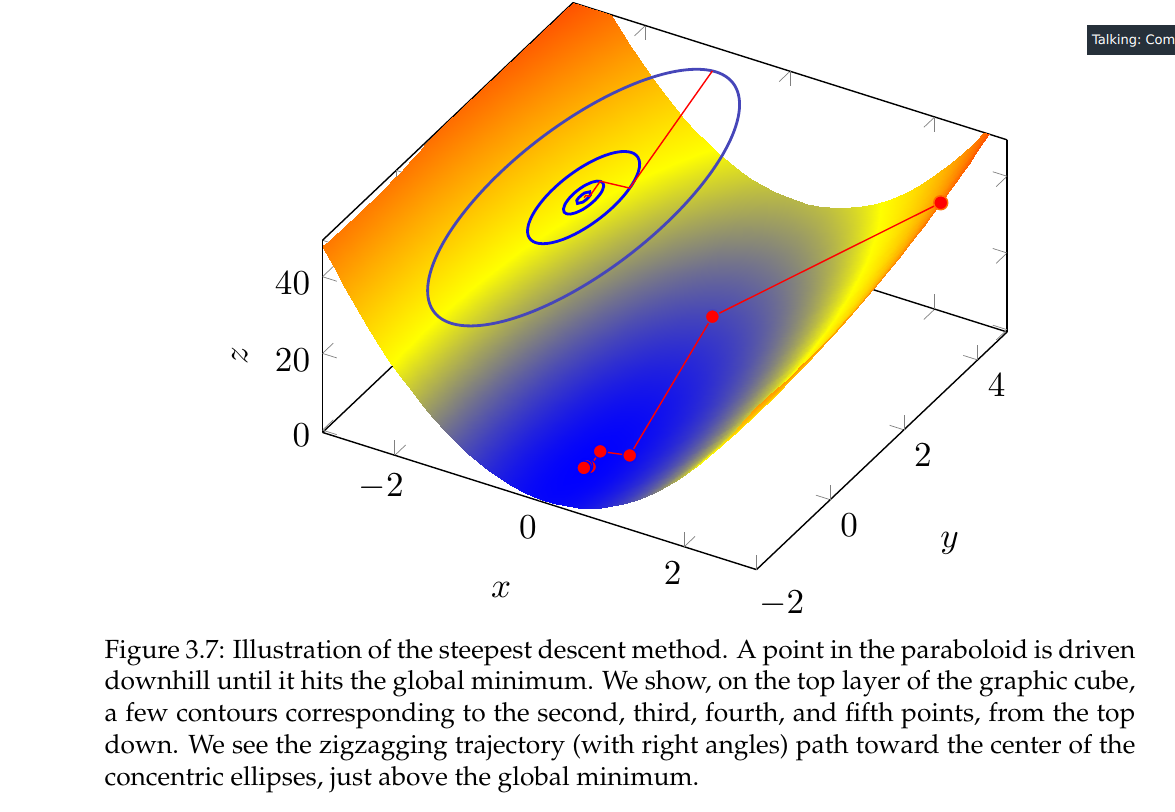

La siguiente figura es calculada (matematicamente) y dibujada con `TikZ`

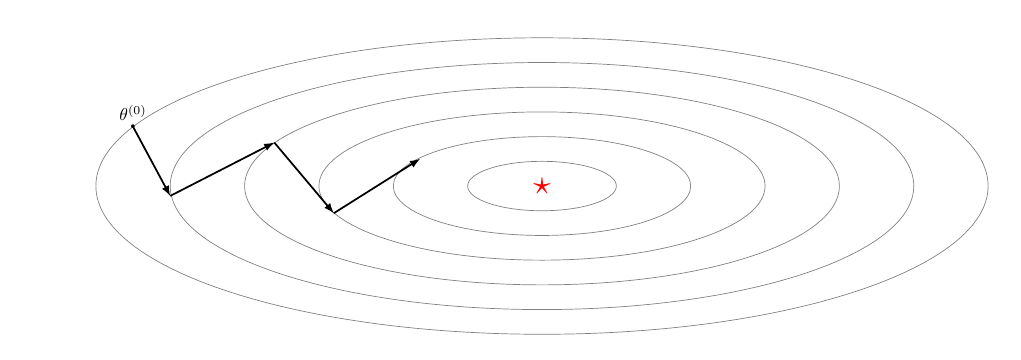

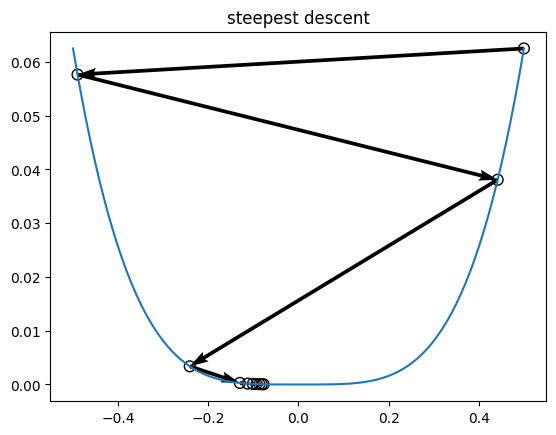

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# definamos una funcion sencilla (estos son programas "juguete")
def f(x):
    return x**4

# calculamos el gradiente de la funcion
def grad(x):
    return 4*x**3

# a alpha yo lo llamo eta, disculpas
eta = 1.98

# punto de arranque x= 0.5
x=0.5
# x=0.9

# lista de puntos
xlist = [x]
ylist = [f(x)]

# maximo numero de iteraciones
M=10
for i in range(M):
    x = x - eta*grad(x)
    y = f(x)
    xlist.append(x)
    ylist.append(f(x))


# graficamos
xdomain = np.arange(-0.5, 0.51, 0.01)
# plt.plot(xdomain, f(xdomain))
# plt.plot(xlist, ylist, 'ro')

plt.title('steepest descent')

# volvemos las listas arreglos
xarr = np.array(xlist)
yarr = np.array(ylist)

# graficamos la curva
plt.plot(xdomain, f(xdomain))

# quiver son flechas
plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:]-yarr[:-1],
           scale_units='xy', angles='xy', scale=1)


plt.scatter( xlist, ylist, s=60, facecolors='none', edgecolors='k')
plt.show()




Por que $\eta=1$  prodcue el descenso al punto exacto (esto solo pasa en 1D, en 2D, 3D, no pasa.

Queremos hallar $\eta$ que acelere el proceso al maximo.

\begin{eqnarray}
f(x) &=& x^4  \\
f'(x) &=& 4 x^3 \\
\varphi(\eta) &=& (x - \eta f'(x))^4 \varphi'(\eta)
\varphi'(\eta) &=& 0 \implies x = \eta f'(x)
\end{eqnarray}
O sea que


$$\eta = \frac{x}{4 x^3} = \frac{1}{4 x^2} $$

Para $x=0.5=1/2$

$$\eta = \frac{1}{4(1/2)^2} = 1 $$

# Gradiente conjugado.
Sl metodo de SD convege pero la convergencia puede ser lenta.
Hestenes and Stephen (Lanzos) inventarion simultaneamente el metodo de gradiente conjugado. La idea era buscar una direccion que lo tire directamente al centro en cada plano.
Encontraron que en vez de la ortogonalidad clasica definieron una nueva

$$ \langle x, y \rangle_A = 0.$$
Esto quiere decir

$$ x^T A y = 0$$
esta es $A$-ortogonality, quiere decir que $x,y$ son direcciones
**conjugadas**.

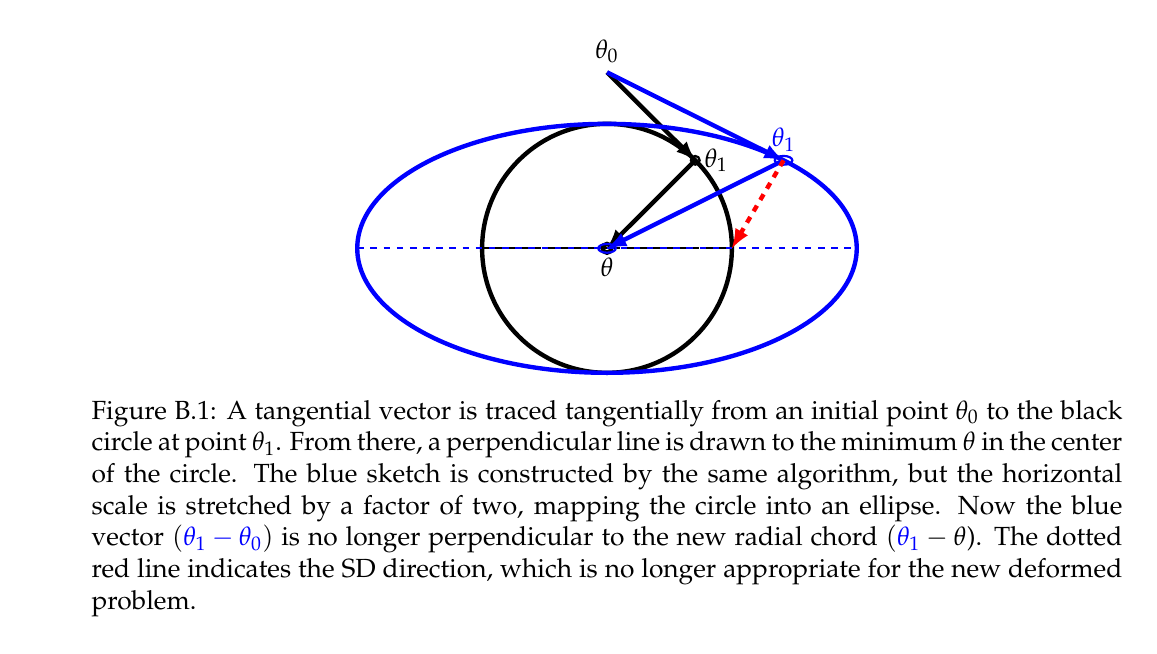

Veamos en el ejemplo 1 que pasa con CG (Conjugate Gradient, Gradiente Conjugado)

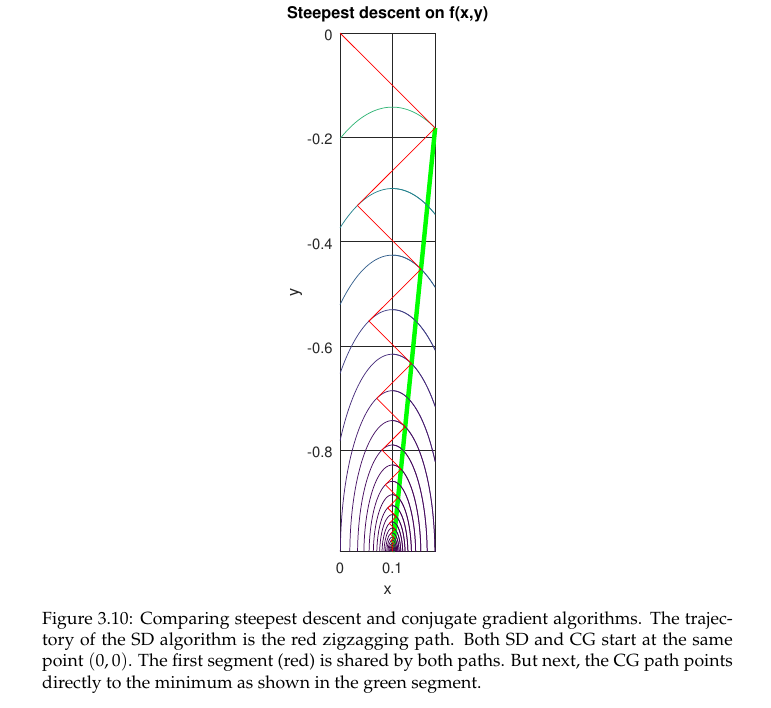

En conclusion:

1. Tanto SD como CG funcionan para resolver problemas lineales $A \theta = b$, no para no lineales. (esto es una limitacion)
2. Si tiene un problema lineal $A \theta = b$, **no dude** en utilizar CG sobre SD, es muchisimo mas rapido.
3. Si el problema no es lineal, existen algoritmos muy buenos. Creo que en los proyectos que desarrollamos en clase se usa el L-BFGS. (que es un CG no lineal)

Los modelos en la practica que tenemos que resolver son mucho mas complicados y necesitamos otras herramientas.

# Proxima clase:
Buscar algoritmos mas generales que el SD y el CG.
Por ejemplo SGD: Stochastic Gradient Descent.
